In [ ]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import h5py
import sys
sys.path.append('../')
import analysis_utils as utils
from datetime import datetime

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

In [6]:
import importlib
importlib.reload(utils)

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py'>

In [ ]:
def check_excess_event(hhs, bc):
    no_excess_events = np.full(shape=hhs.shape[0:2], fill_value=True)
    for i, _hh_file in enumerate(hhs):
        for j, _hh in enumerate(_hh_file):
            if np.sum(_hh[bc > 2000]) > 5 or np.sum(_hh) < 50:
                no_excess_events[i, j] = False

    return no_excess_events

def get_events_after_cut(hhs, bc, good_dets, no_excess_events, thr=4000):
    events_after_cut = []
    for i, _hh_file in enumerate(hhs):
        for j, _hh in enumerate(_hh_file):
            if not good_dets[i, j] or not no_excess_events[i, j]:
                continue
            n_large_events = np.sum(_hh[bc > thr])
            if n_large_events > 0:
                events_after_cut.append((i, j))
    return events_after_cut

## Three 12-hour dataset

In [43]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241101_0e_long'
data_prefix = r'20241101_abcdefg_0e_'
bc_0, hhs_0, good_dets_0, temps_0 = utils.load_histograms(data_dir, data_prefix, 683)
no_excess_events_0 = check_excess_event(hhs_0, bc_0)

In [44]:
hh_all_sum_0 = np.sum(np.sum(hhs_0, axis=0), axis=0)
hh_cut_det_0 = hhs_0[good_dets_0]
hh_cut_all_0 = hhs_0[np.logical_and(good_dets_0, no_excess_events_0)]

hh_cut_det_sum_0 = np.sum(hh_cut_det_0, axis=0)
hh_cut_all_sum_0 = np.sum(hh_cut_all_0, axis=0)

Text(0.5, 1.0, 'Neutral sphere data (11.4 hours), begins 2024-11-01 17:51:08.986437')

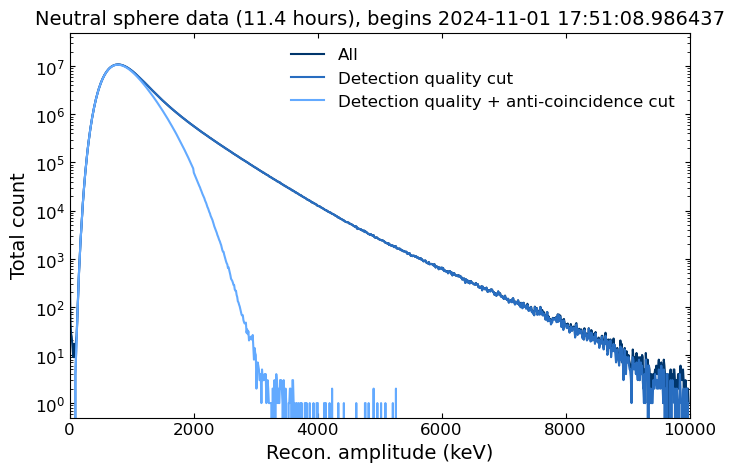

In [101]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_0, hh_all_sum_0, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_0, hh_cut_det_sum_0, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_0, hh_cut_all_sum_0, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Neutral sphere data ({683/60:.1f} hours), begins {start_time}')

Look into the large events after cut.

In [64]:
events_after_cut_0 = get_events_after_cut(hhs_0, bc_0, good_dets_0, no_excess_events_0, thr=4000)
print('Number of windows with large events (> 4000 keV): ', len(events_after_cut_0))


Number of windows with large events (> 4000 keV):  19


/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_67.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_68.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_119.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_212.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_214.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_318.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_352.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_386.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_406.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_436.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_476.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_486.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_490.hdf5
/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_508.hdf5
/Volumes/LaCie/dm_data/20241101_0e_l

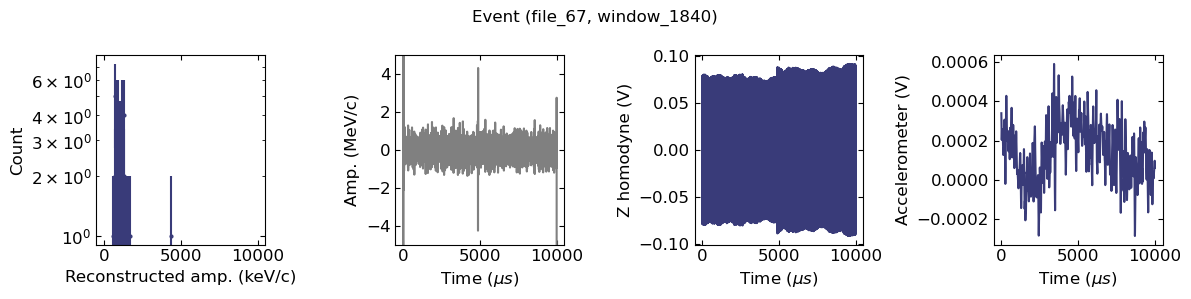

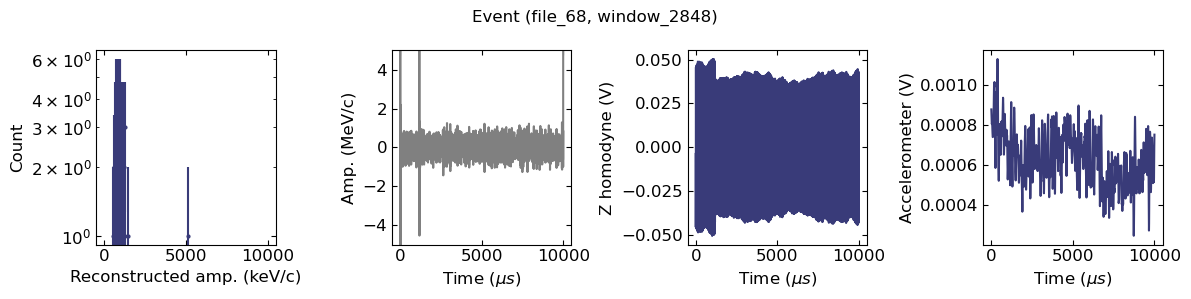

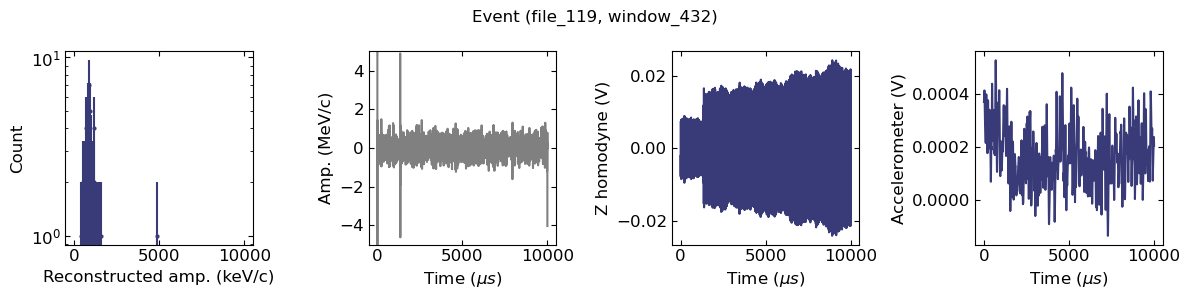

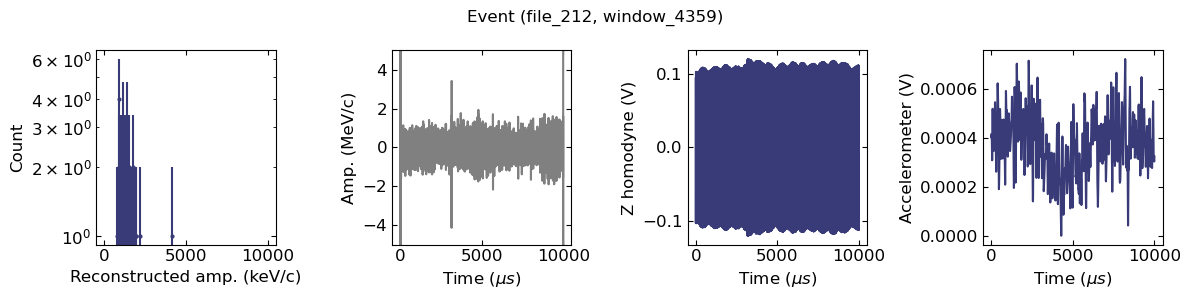

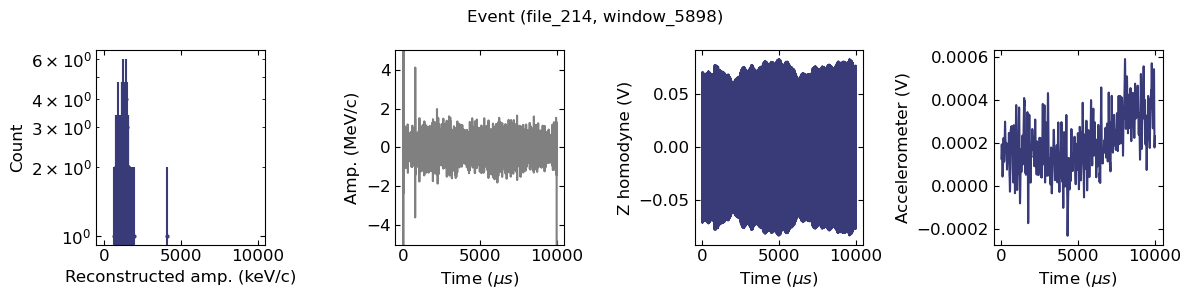

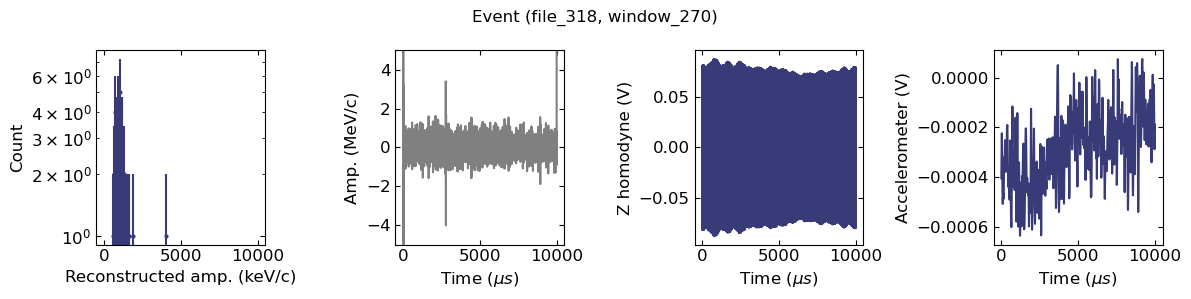

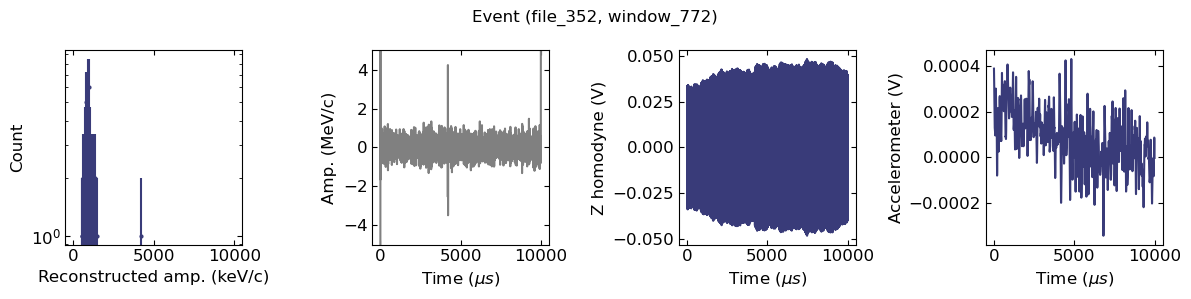

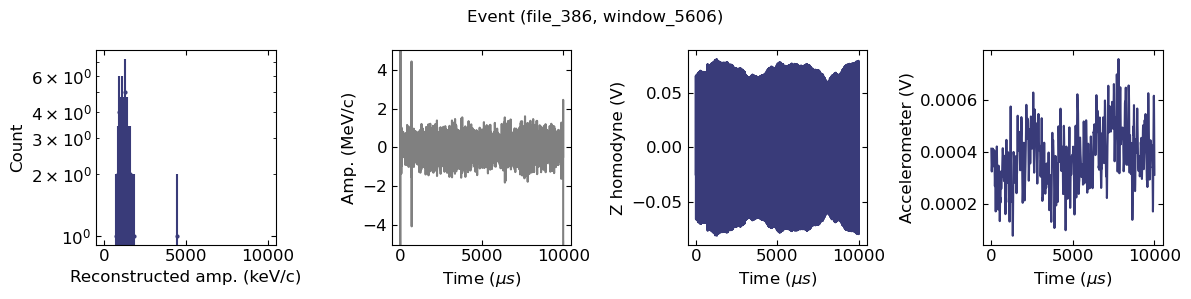

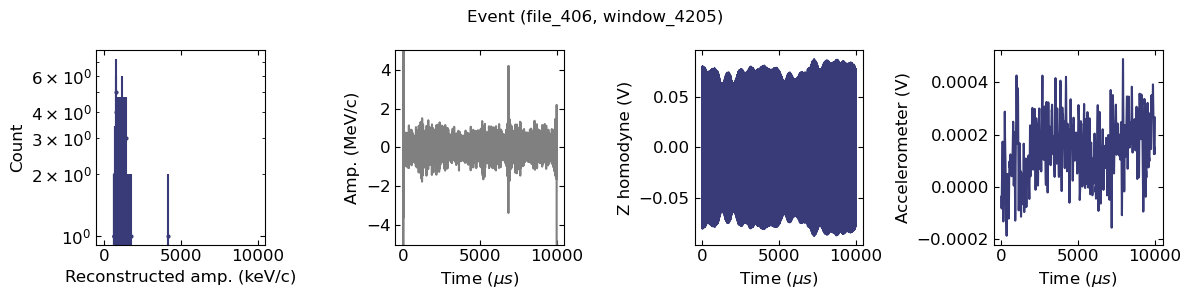

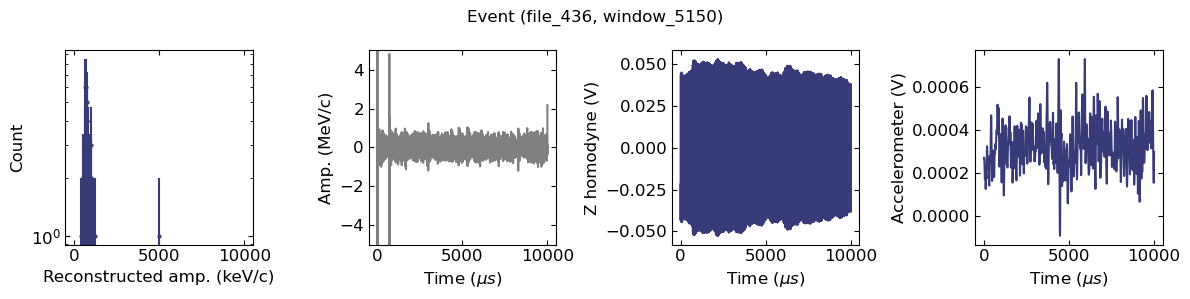

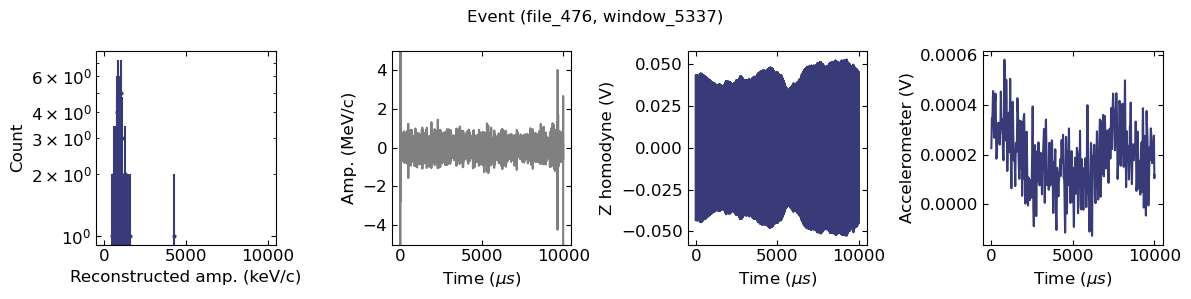

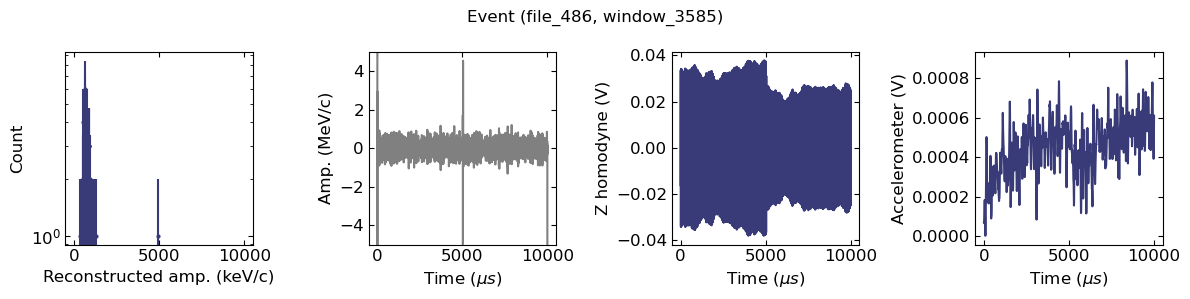

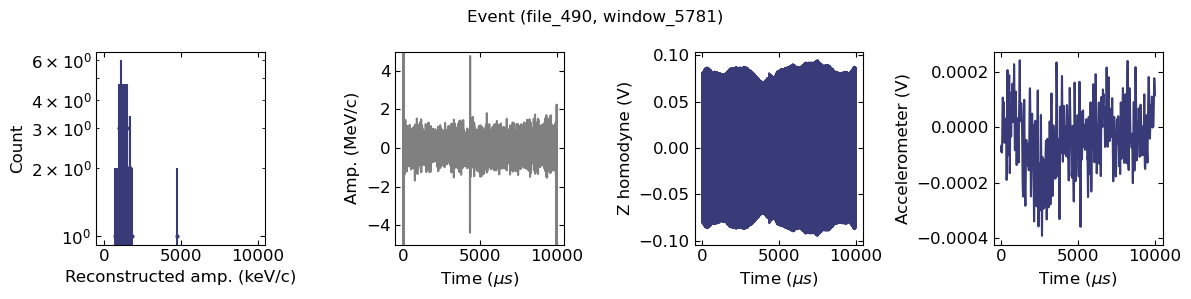

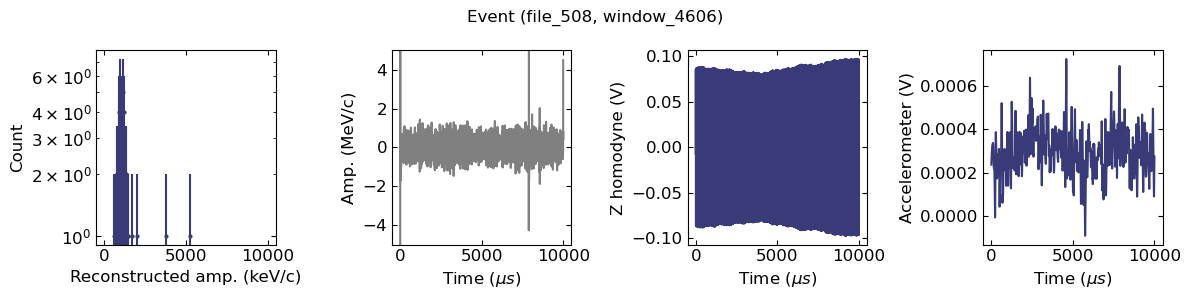

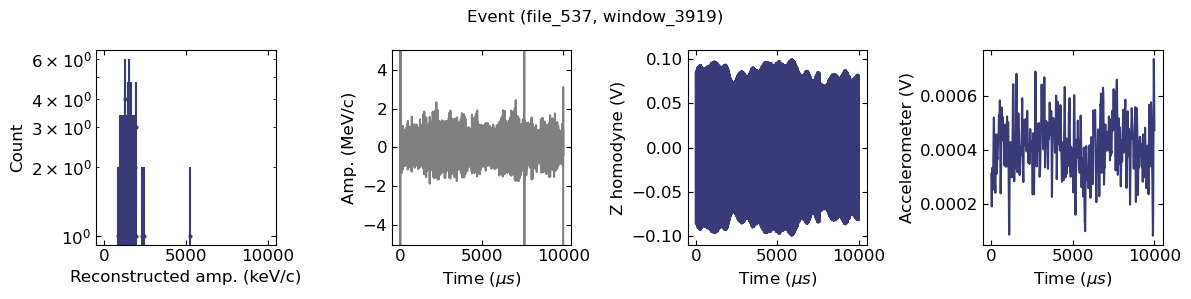

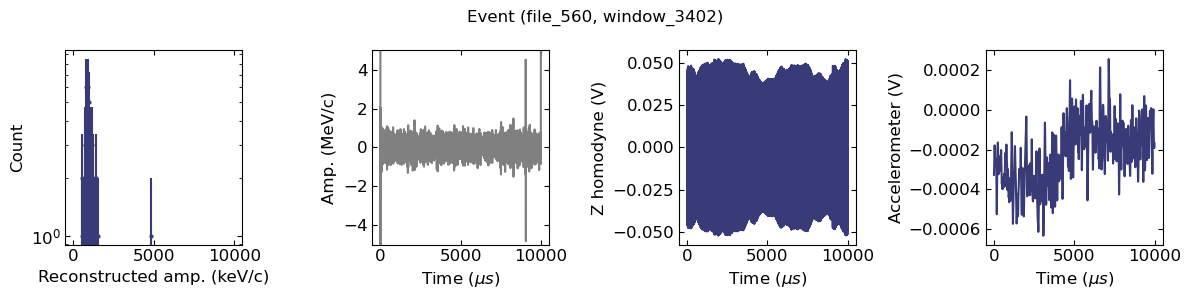

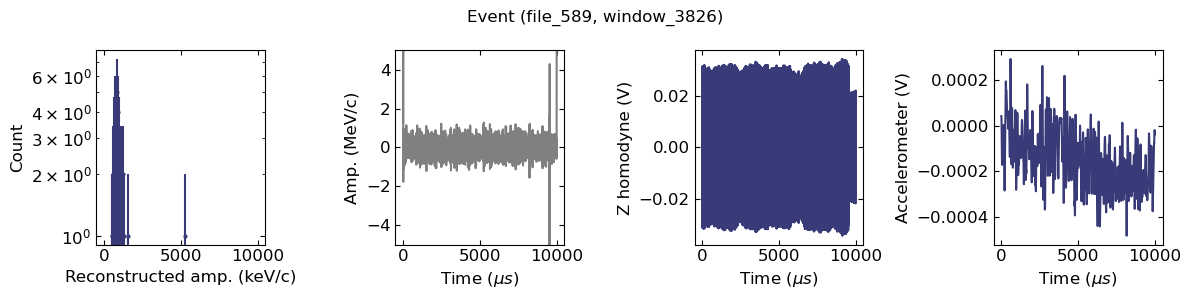

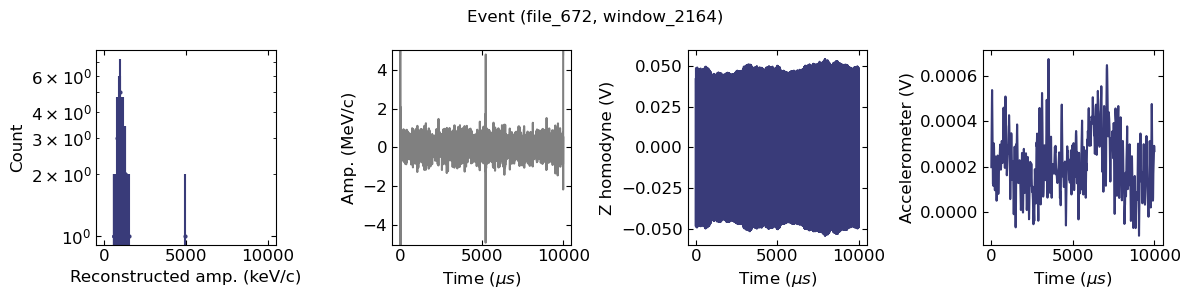

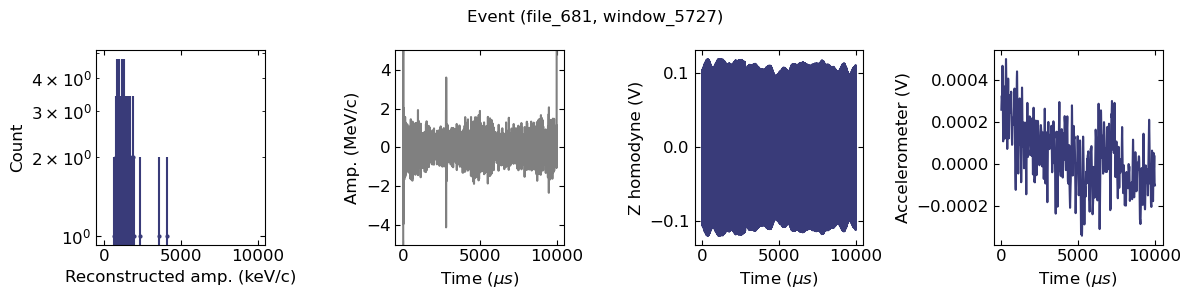

In [ ]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241101_0e_long'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_0:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_68.hdf5


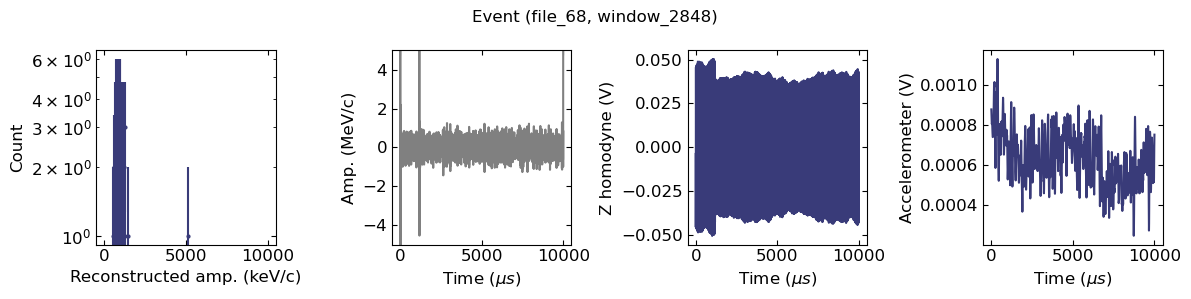

In [67]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241101_0e_long'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

i, j = 68, 2848
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

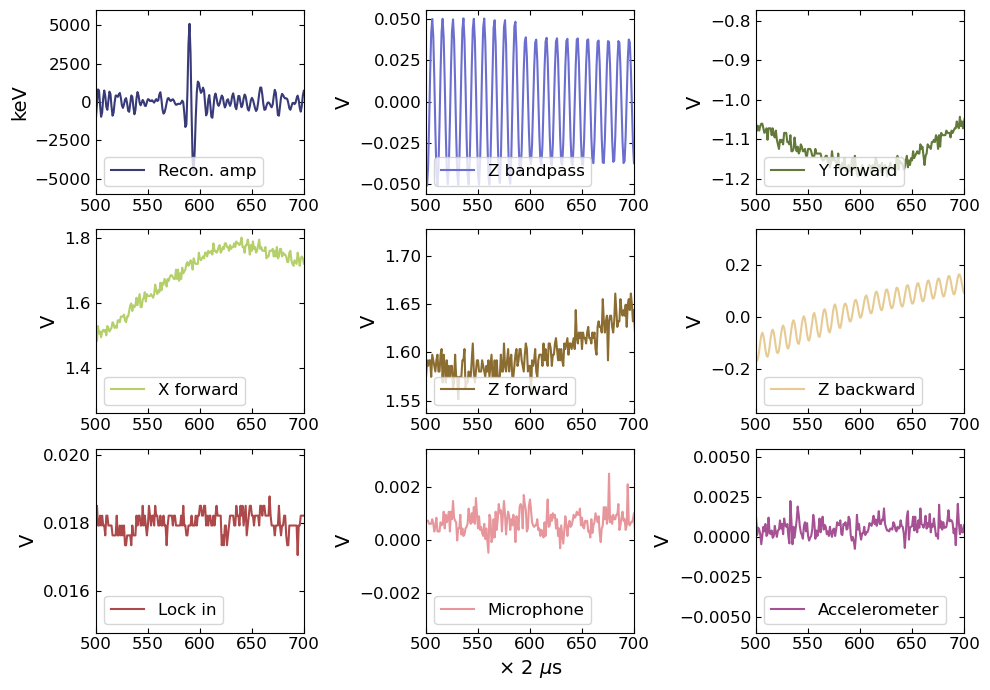

In [74]:
colors = plt.colormaps.get_cmap('tab20b').resampled(10).colors

f = h5py.File(r'/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_68.hdf5', "r")

fig, axes = plt.subplots(3, 3, figsize=(10, 7))

axes.flatten()[0].plot(amp_lp*amp2kev, color=colors[0], label='Recon. amp')
axes.flatten()[0].set_ylim(-6000, 6000)
axes.flatten()[0].set_ylabel('keV')

axes.flatten()[1].plot(zz_bp, color=colors[1], label='Z bandpass')
axes.flatten()[1].set_ylabel('V')

labels = ['Y forward', 'X forward', 'Z forward', 'Z backward', 'Lock in', 'Microphone', 'Accelerometer']
for i, channel in enumerate(['a', 'b', 'c', 'd', 'e', 'f', 'g']):
    tt = f['data'][f'channel_{channel}'][:] * f['data'][f'channel_{channel}'].attrs['adc2mv'] / 1e3
    reshaped = np.reshape(tt, (int(tt.size / window_length), window_length))

    axes.flatten()[i+2].plot(reshaped[j], color=colors[i+2], label=labels[i])
    axes.flatten()[i+2].set_ylabel('V')

    if i == 5:
        axes.flatten()[i+2].set_xlabel(r'$\times$ 2 $\mu$s')

for ax in axes.flatten():
    ax.set_xlim(500, 700)
    ax.legend(frameon=True, loc='lower left')

fig.tight_layout()


In [ ]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241103_0e_long'
data_prefix = r'20241103_abcdefg_0e_'
bc_1, hhs_1, good_dets_1, temps_1 = utils.load_histograms(data_dir, data_prefix, 720)
no_excess_events_1 = check_excess_event(hhs_1, bc_1)

In [33]:
hh_all_sum_1 = np.sum(np.sum(hhs_1, axis=0), axis=0)
hh_cut_det_1 = hhs_1[good_dets_1]
hh_cut_all_1 = hhs_1[np.logical_and(good_dets_1, no_excess_events_1)]

hh_cut_det_sum_1 = np.sum(hh_cut_det_1, axis=0)
hh_cut_all_sum_1 = np.sum(hh_cut_all_1, axis=0)

Text(0.5, 1.0, 'Neutral sphere data (12.0 hour), begins 2024-11-03 07:25:33.766208')

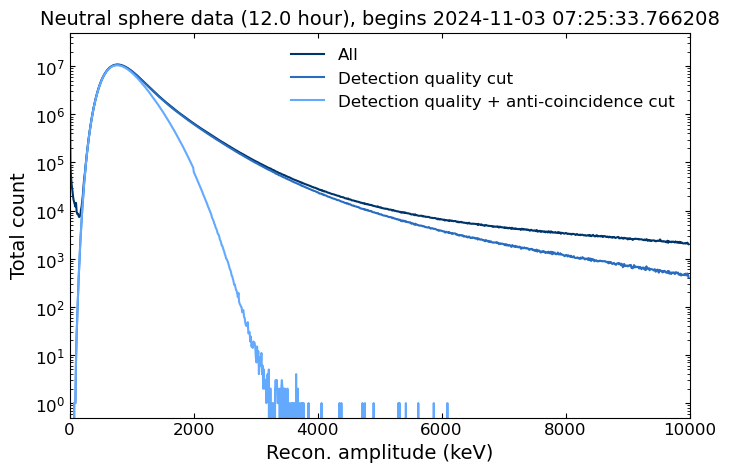

In [100]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_1, hh_all_sum_1, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_1, hh_cut_det_sum_1, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_1, hh_cut_all_sum_1, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Neutral sphere data ({720/60:.1f} hour), begins {start_time}')

In [62]:
events_after_cut_1 = get_events_after_cut(hhs_1, bc_1, good_dets_1, no_excess_events_1, thr=4000)
print('Number of windows with large events (> 4000 keV): ', len(events_after_cut_1))

Number of windows with large events (> 4000 keV):  10


40 5457
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_40.hdf5
42 2698
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_42.hdf5
103 44
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_103.hdf5
399 1253
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_399.hdf5
417 1702
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_417.hdf5
451 150
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_451.hdf5
497 3189
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_497.hdf5
510 2261
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_510.hdf5
623 34
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_623.hdf5
646 3840
/Volumes/LaCie/dm_data/20241103_0e_long/20241103_abcdefg_0e_646.hdf5


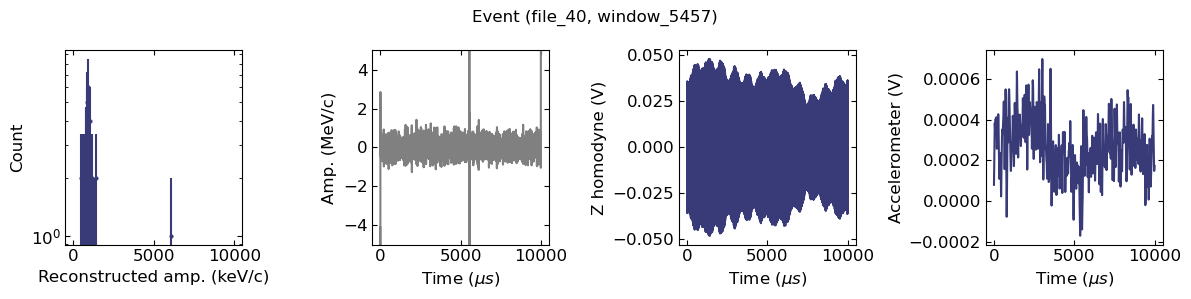

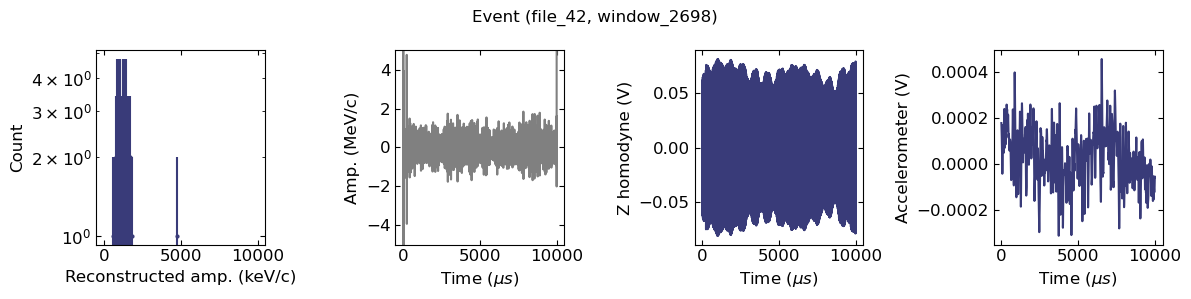

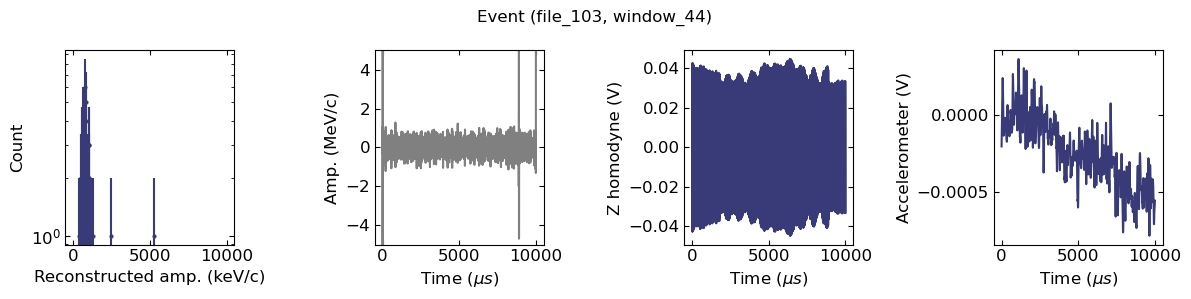

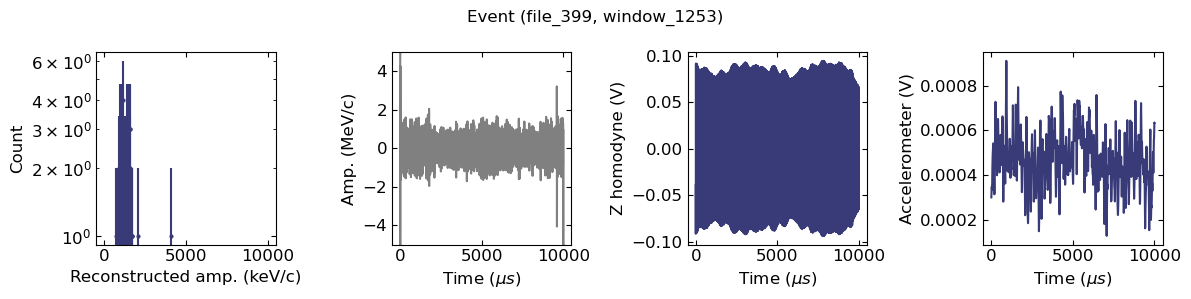

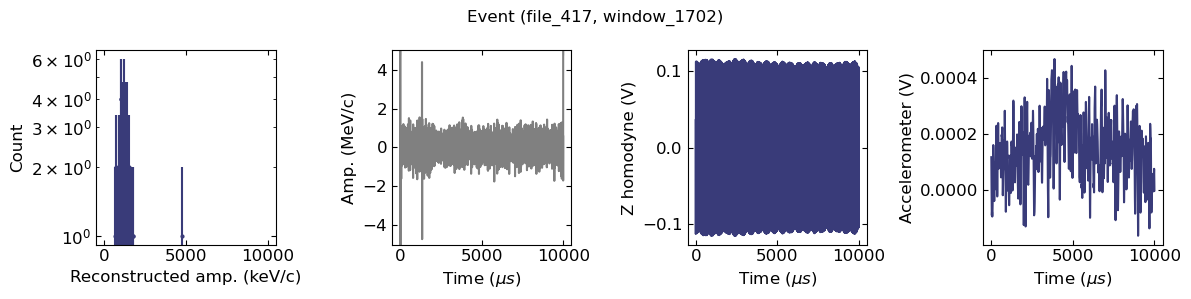

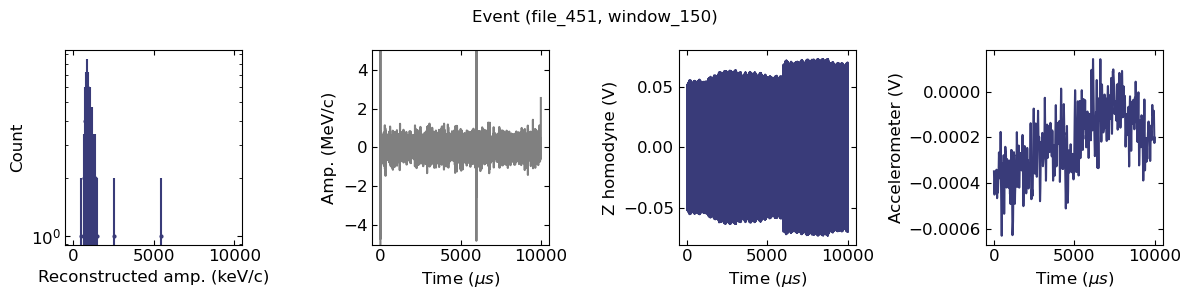

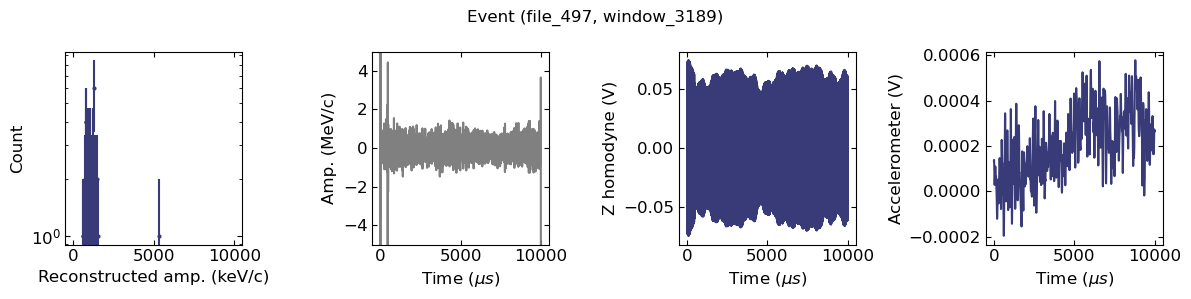

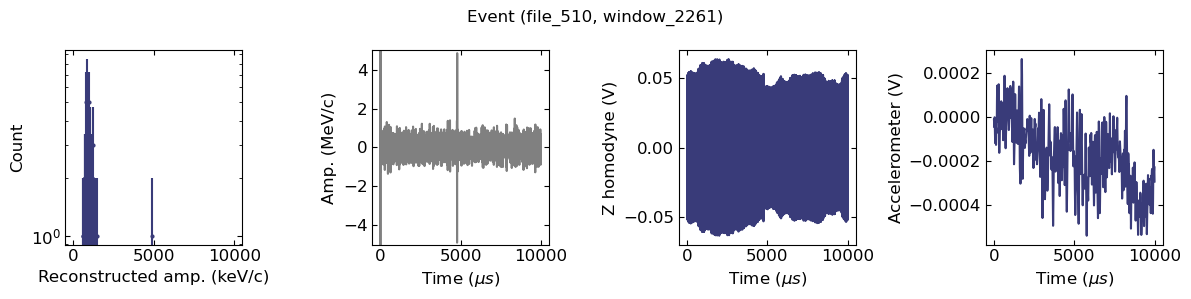

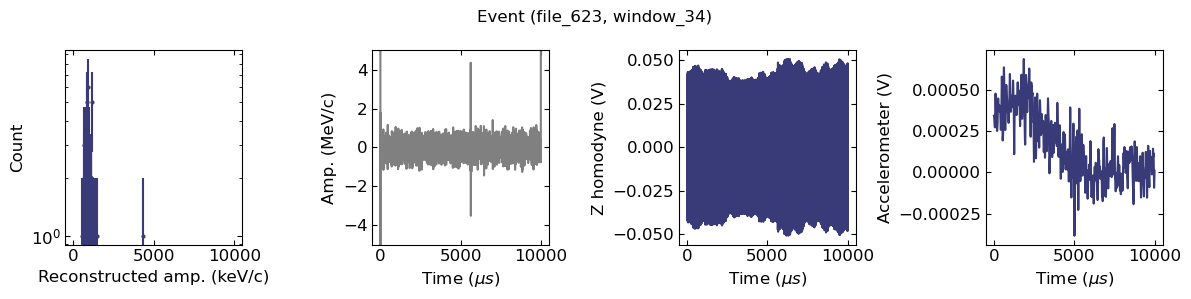

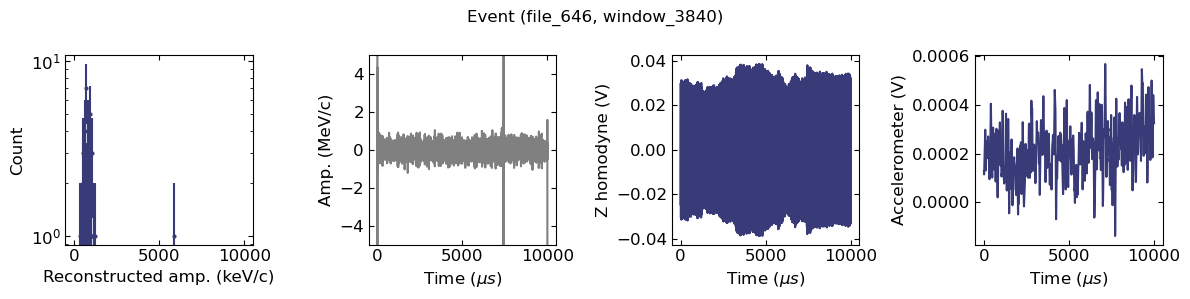

In [28]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241103_0e_long'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_1:
    print(i, j)
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

In [36]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241103_0e_long_1'
data_prefix = r'20241103_abcdefg_0e_'
bc_2, hhs_2, good_dets_2, temps_2 = utils.load_histograms(data_dir, data_prefix, 720)
no_excess_events_2 = check_excess_event(hhs_2, bc_2)

In [ ]:
hh_all_sum_2 = np.sum(np.sum(hhs_2, axis=0), axis=0)
hh_cut_det_2 = hhs_2[good_dets_2]
hh_cut_all_2 = hhs_2[np.logical_and(good_dets_2, no_excess_events_2)]

hh_cut_det_sum_2 = np.sum(hh_cut_det_2, axis=0)
hh_cut_all_sum_2 = np.sum(b_cut_all_2, axis=0)

Text(0.5, 1.0, 'Neutral sphere data (12.0 hour), begins 2024-11-03 19:56:07.568276')

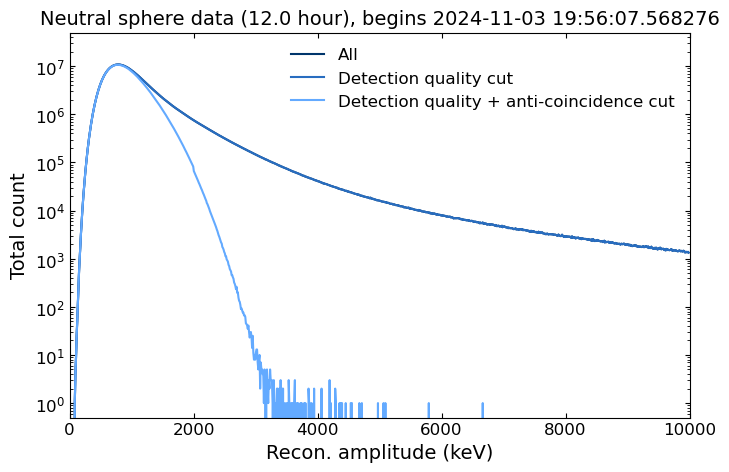

In [99]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_2, hh_all_sum_2, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_2, hh_cut_det_sum_2, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_2, hh_cut_all_sum_2, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Neutral sphere data ({720/60:.1f} hour), begins {start_time}')

In [66]:
events_after_cut_2 = get_events_after_cut(hhs_2, bc_2, good_dets_2, no_excess_events_2, thr=4000)
print('Number of windows with large events (> 4000 keV): ', len(events_after_cut_2))

Number of windows with large events (> 4000 keV):  21


16 4484
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_16.hdf5
19 5244
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_19.hdf5
40 1739
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_40.hdf5
41 3805
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_41.hdf5
52 2601
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_52.hdf5
125 4682
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_125.hdf5
157 4539
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_157.hdf5
259 322
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_259.hdf5
261 3979
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_261.hdf5
294 3820
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_294.hdf5
315 1454
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_315.hdf5
394 5094
/Volumes/LaCie/dm_data/20241103_0e_long_1/20241103_abcdefg_0e_394.hdf5
457 3083
/Volumes/LaCie/dm_data/20241103_0e_long_1/

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:576: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 4, figsize=(12, 3))


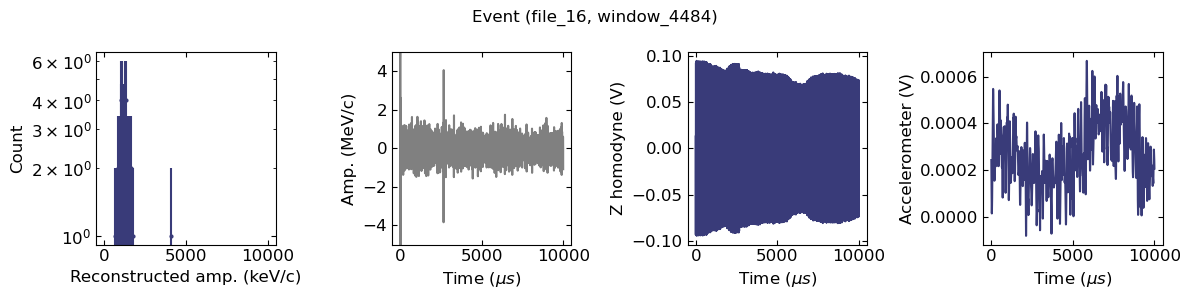

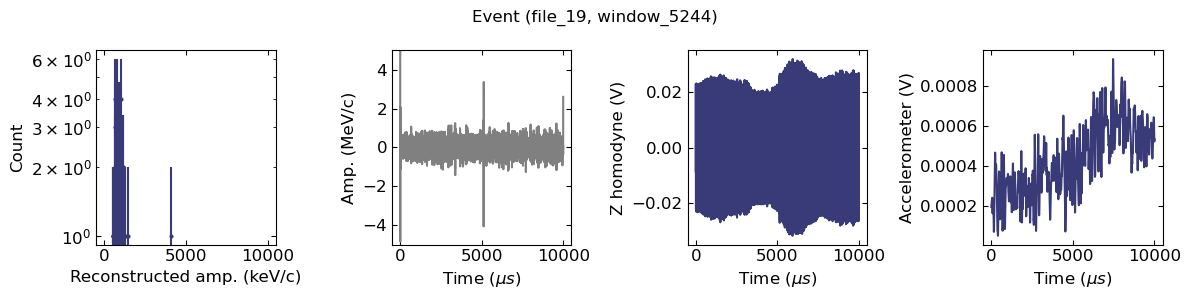

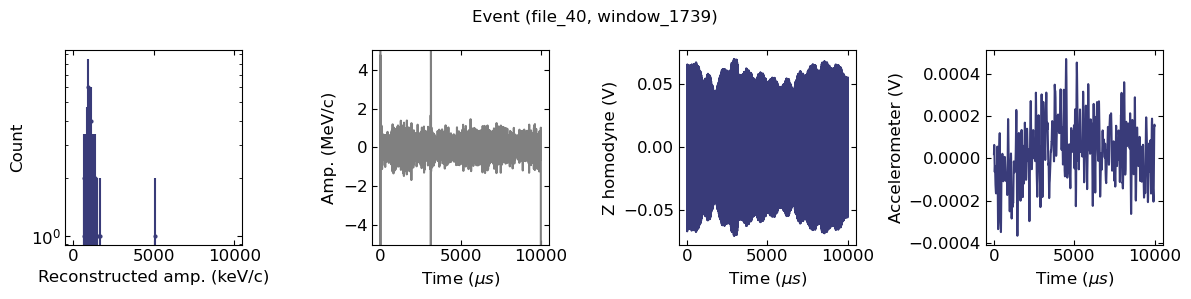

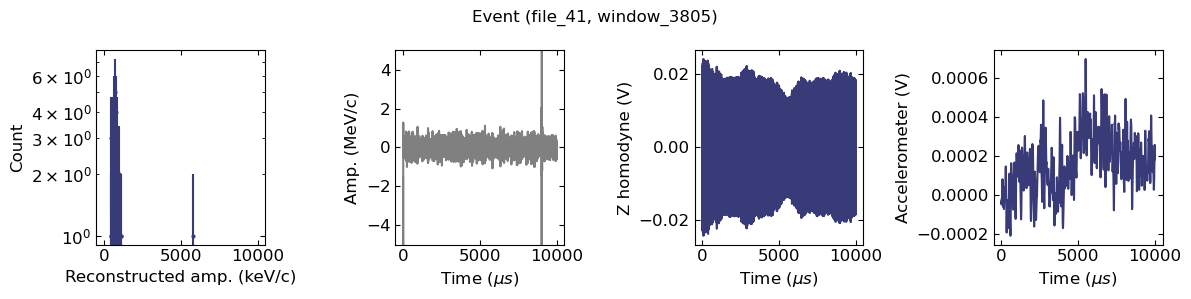

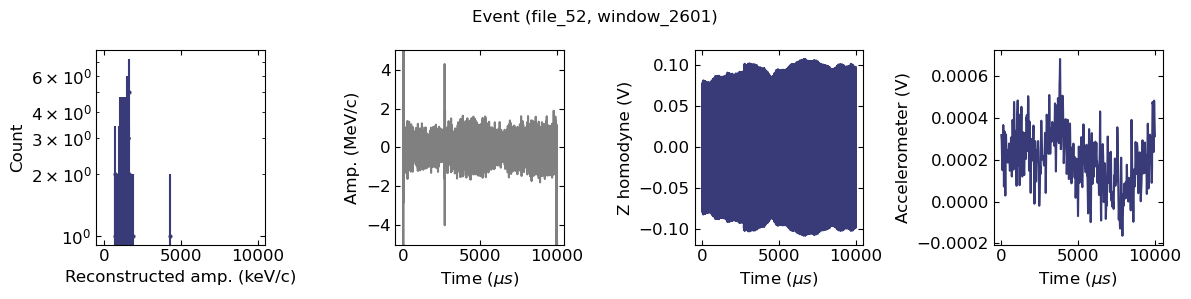

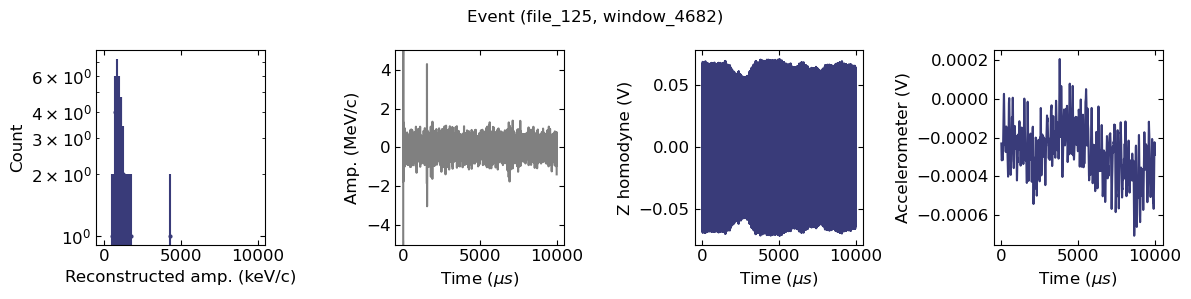

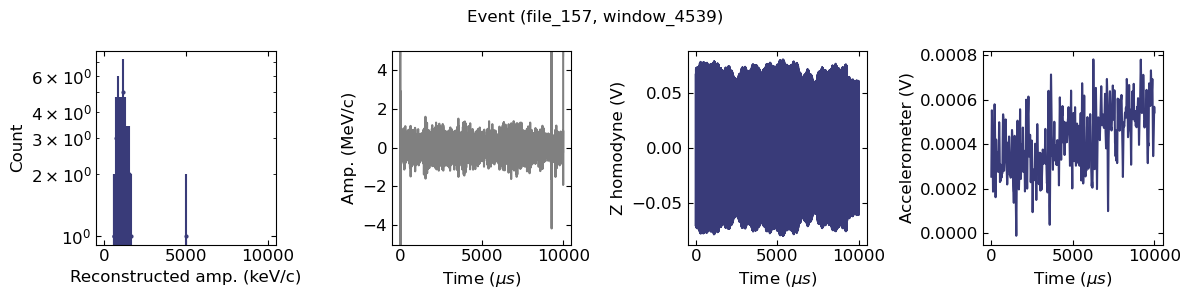

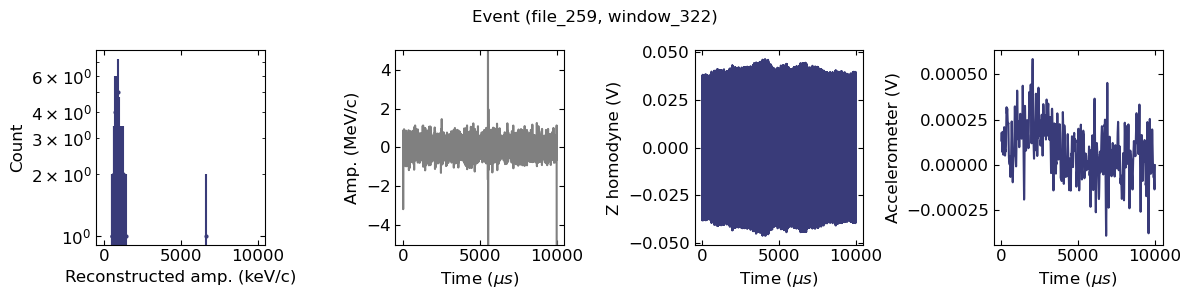

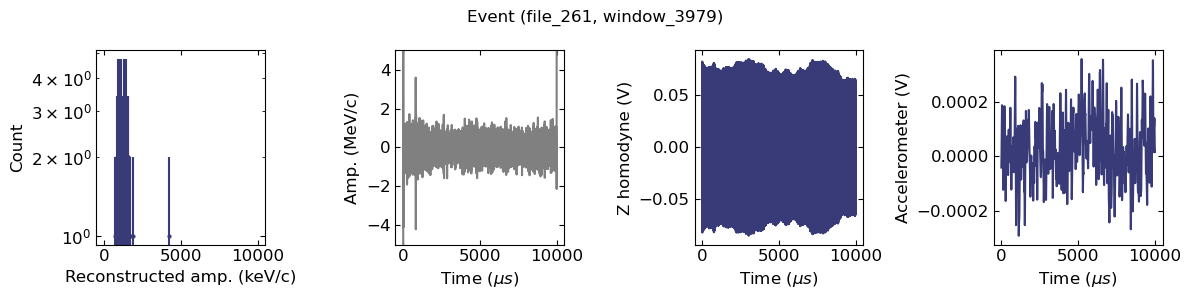

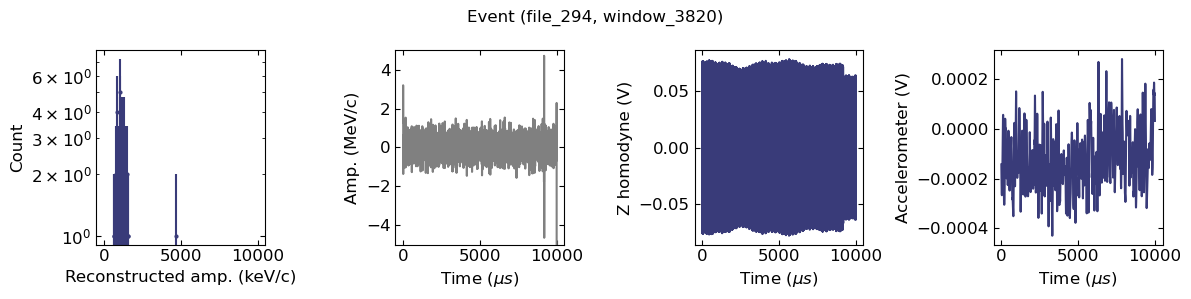

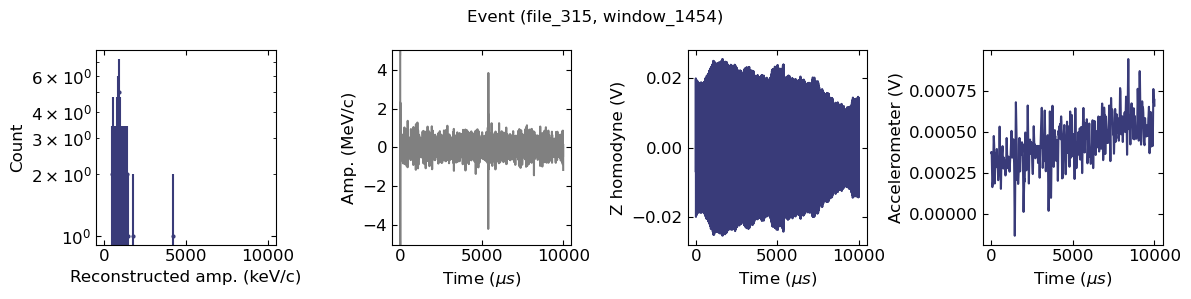

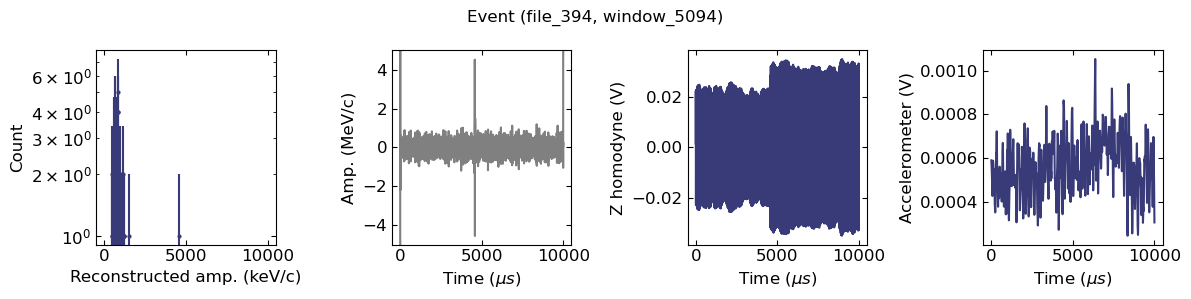

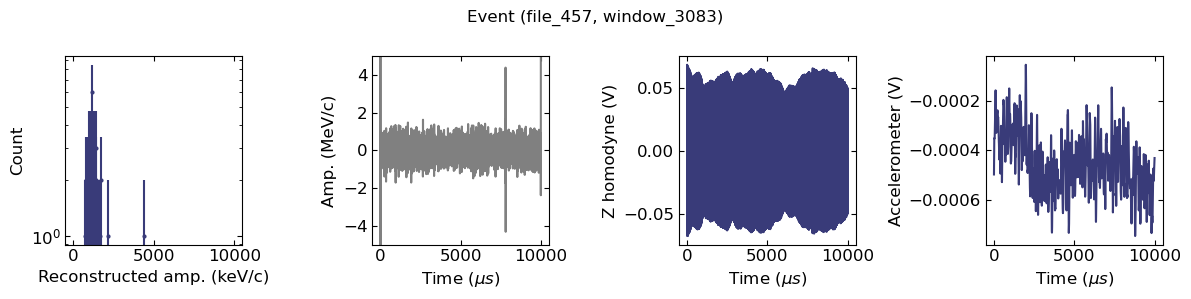

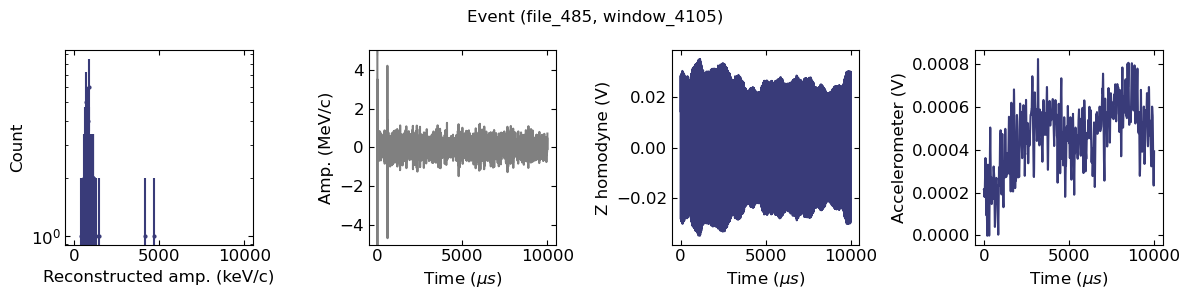

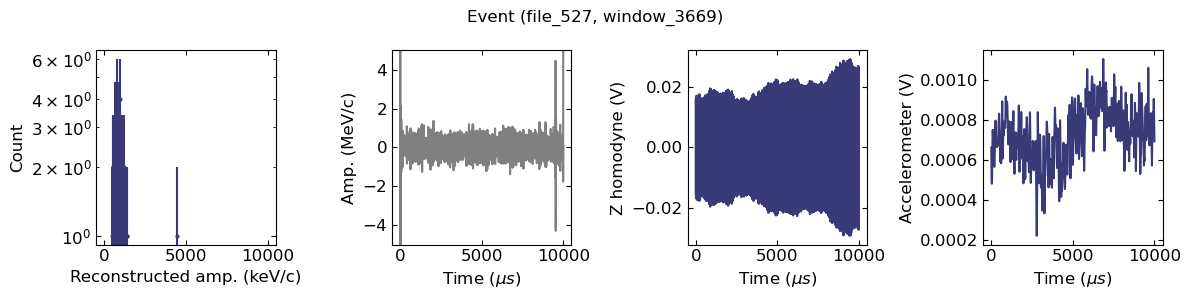

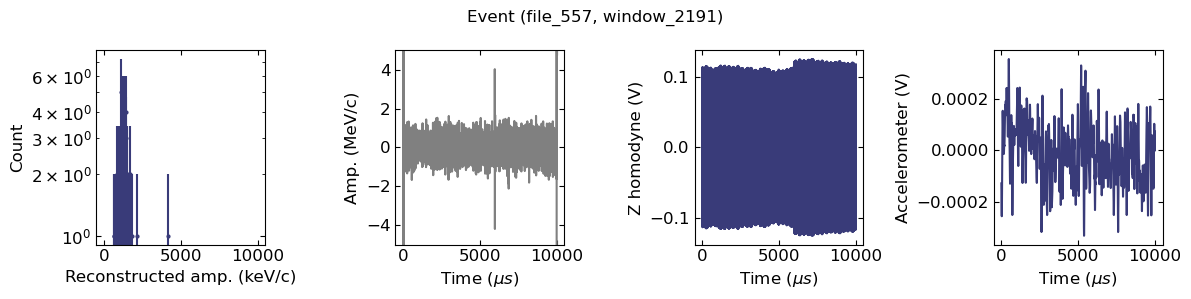

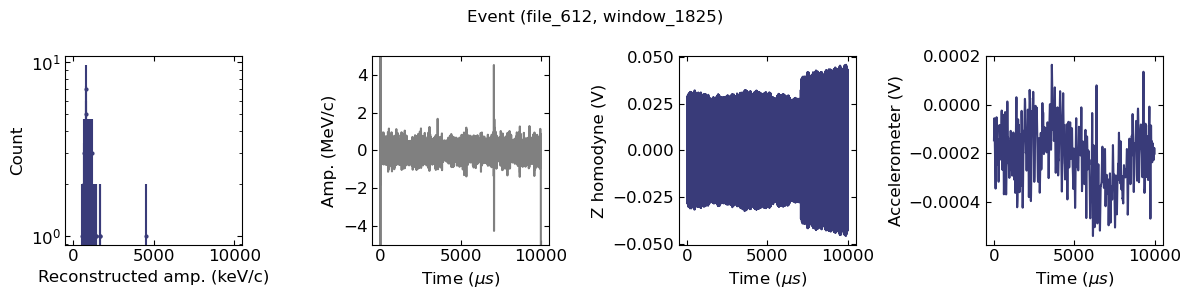

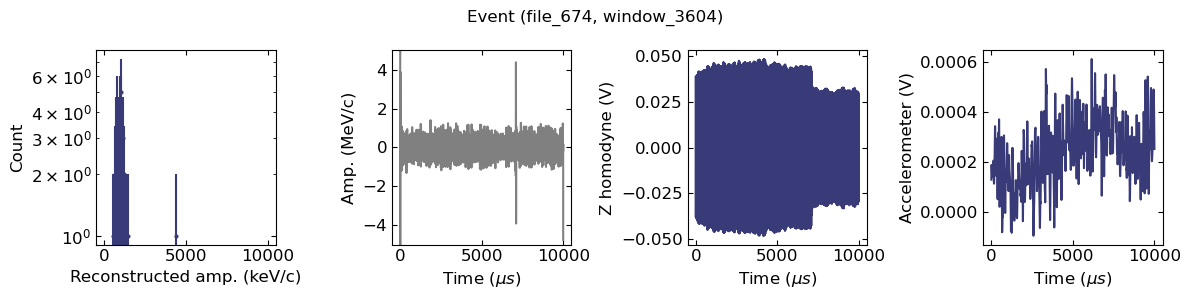

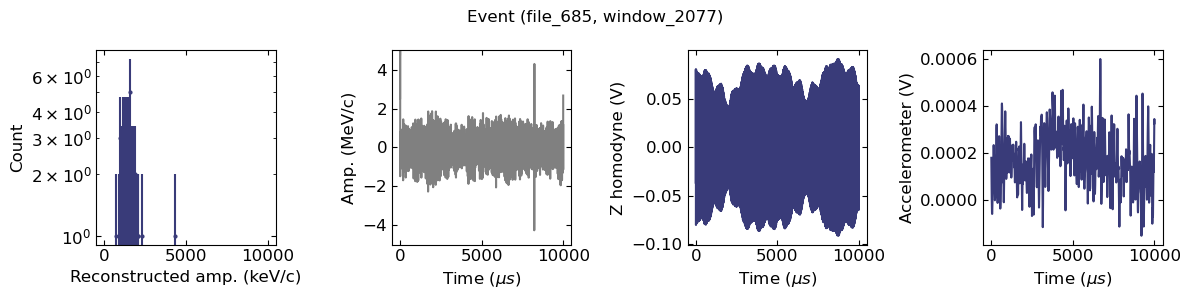

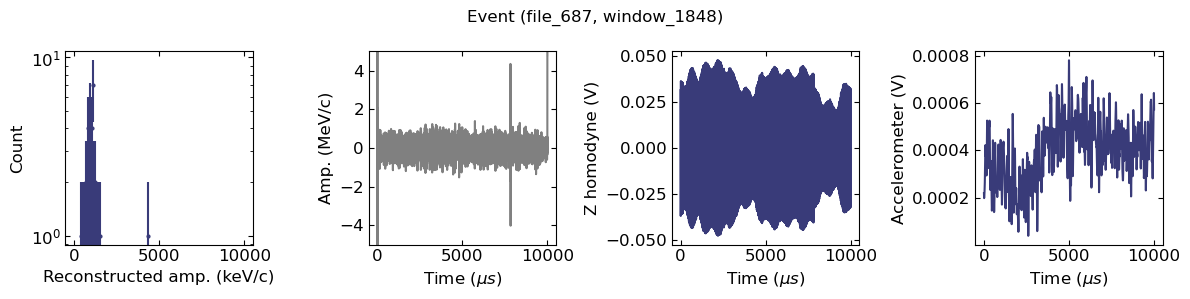

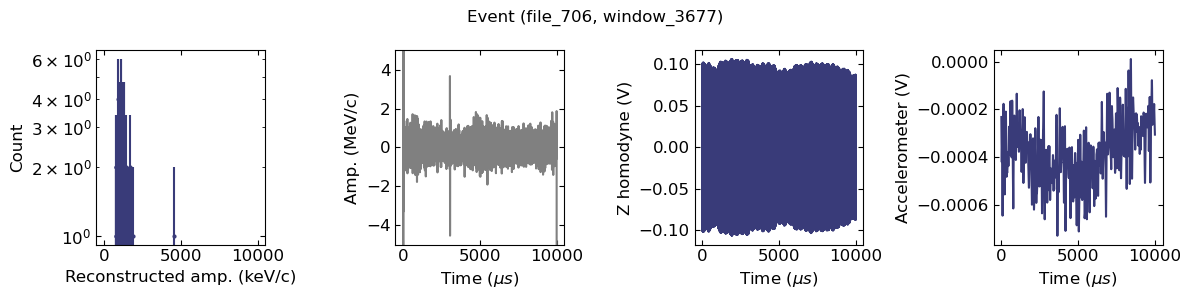

In [41]:
data_dir = r'/Volumes/LaCie/dm_data/20241103_0e_long_1'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_2:
    print(i, j)
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

## Total histogram with all cuts

In [97]:
print('Fractions cut by the detection quality cut:')

print(hh_cut_det_0.shape[0] / (hhs_0.shape[0] * hhs_0.shape[1]))
print(hh_cut_det_1.shape[0] / (hhs_1.shape[0] * hhs_1.shape[1]))
print(hh_cut_det_2.shape[0] / (hhs_2.shape[0] * hhs_2.shape[1]))

Fractions cut by the detection quality cut:
0.998475597852611
0.9497518518518518
0.9991685185185185


In [98]:
print('Fractions cut by the anti-concidence cut:')

print((hh_cut_det_0.shape[0] - hh_cut_all_0.shape[0]) / (hhs_0.shape[0] * hhs_0.shape[1]))
print((hh_cut_det_1.shape[0] - hh_cut_all_1.shape[0]) / (hhs_1.shape[0] * hhs_1.shape[1]))
print((hh_cut_det_2.shape[0] - hh_cut_all_2.shape[0]) / (hhs_2.shape[0] * hhs_2.shape[1]))

Fractions cut by the anti-concidence cut:
0.12125988286969254
0.1367863425925926
0.16431296296296297


In [93]:
n_window = hh_cut_all_0.shape[0] + hh_cut_all_1.shape[0] + hh_cut_all_2.shape[0]
n_search_per_win = (5000 - 150) / 25
time_per_search = 2e-6 * 25

t_total = n_window * n_search_per_win * time_per_search


Text(0.5, 1.0, 'Neutral sphere data, all (29.8 hour)')

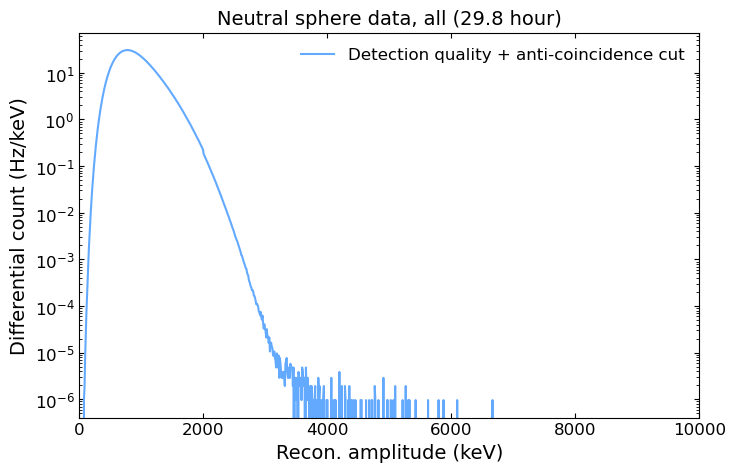

In [94]:
hh_cut_all_sum_all = hh_cut_all_sum_0 + hh_cut_all_sum_1 + hh_cut_all_sum_2

plt.subplots(figsize=(8, 5))
plt.plot(bc_0, hh_cut_all_sum_all / (t_total * (bc_0[1] - bc_0[0])), '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Differential count (Hz/keV)')
plt.title(f'Neutral sphere data, all ({(n_window * 10e-3)/3600:.1f} hour)')

In [85]:
19.7 / (24 + 11.4)

0.556497175141243